In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("car_purchase_data.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [6]:
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=3, random_state=42)
classifier.fit(X_train,y_train)

KMeans(n_clusters=3, random_state=42)

In [7]:
y_pred=classifier.predict(X_test)

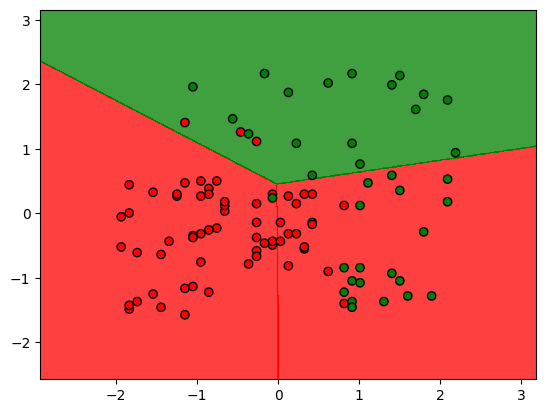

In [8]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.01),
                     np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.01))
plt.contourf(X1, X2, classifier.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'green']), edgecolors='k'); plt.show()